Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking
using CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "08")
cd(ProjDir)

### snippet 8.25

In [3]:
N = 100                                                    # individuals
height  = rand(Normal(10,2), N) ;              # sim total height of each
leg_prop = rand(Uniform(0.4,0.5), N);      # leg as proportion of height

sim left leg as proportion + error

In [4]:
leg_left = leg_prop .* height .+  rand(Normal( 0 , 0.02 ), N);

sim right leg as proportion + error

In [5]:
leg_right = leg_prop .* height .+  rand(Normal( 0 , 0.02 ), N);

combine into data frame

In [6]:
df =  DataFrame(height=height, leg_left = leg_left, leg_right = leg_right);

Show first 5 rows

In [7]:
first(df, 5)

,height,leg_left,leg_right
,Float64,Float64,Float64
1,8.32024,3.95695,3.99111
2,9.41214,4.36041,4.38765
3,9.84585,4.84809,4.79381
4,10.0555,4.02678,4.01652
5,13.192,6.47849,6.51033


Define the Stan language model

In [8]:
m_5_8_model = "
data{
    int N;
    real height[N];
    real leg_right[N];
    real leg_left[N];
}
parameters{
    real a;
    real bl;
    real br;
    real sigma;
}
model{
    vector[N] mu;
    sigma ~ cauchy( 0 , 1 );
    br ~ normal( 2 , 10 );
    bl ~ normal( 2 , 10 );
    a ~ normal( 10 , 100 );
    for ( i in 1:100 ) {
        mu[i] = a + bl * leg_left[i] + br * leg_right[i];
    }
    height ~ normal( mu , sigma );
}
";

Define the Stanmodel and set the output format to :mcmcchain.

In [9]:
stanmodel = Stanmodel(name="m_5_8_model", monitors = ["a", "br", "bl", "sigma"],
  model=m_5_8_model, output_format=:mcmcchain);
# Input data for cmdstan
m_8_8_data = Dict("N" => size(df, 1), "height" => df[:height],
    "leg_left" => df[:leg_left], "leg_right" => df[:leg_right]);
# Sample using cmdstan
rc, chn, cnames = stan(stanmodel, m_8_8_data, ProjDir, diagnostics=false,
  summary=false, CmdStanDir=CMDSTAN_HOME);
# Describe the draws
describe(chn)


File /Users/rob/.julia/dev/StatisticalRethinking/scripts/08/tmp/m_5_8_model.stan will be updated.

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
          Mean         SD       Naive SE       MCSE      ESS
    a 1.143469081 0.325580450 0.0051478789 0.0071616679 1000
   bl 0.052134128 2.096946676 0.0331556381 0.0540708689 1000
   br 1.916301984 2.085987727 0.0329823619 0.0535474971 1000
sigma 0.674866642 0.046052117 0.0007281479 0.0009027424 1000

Quantiles:
          2.5%       25.0%      50.0%     75.0%      97.5%  
    a  0.47601245  0.9249415 1.14794500 1.3573300 1.77383550
   bl -4.06745500 -1.3202925 0.05659075 1.4115875 4.21832650
   br -2.22306650  0.5734465 1.92172000 3.2938375 6.01984100
sigma  0.59154292  0.6421290 0.67304450 0.7036620 0.77432528



Plot the density of posterior draws

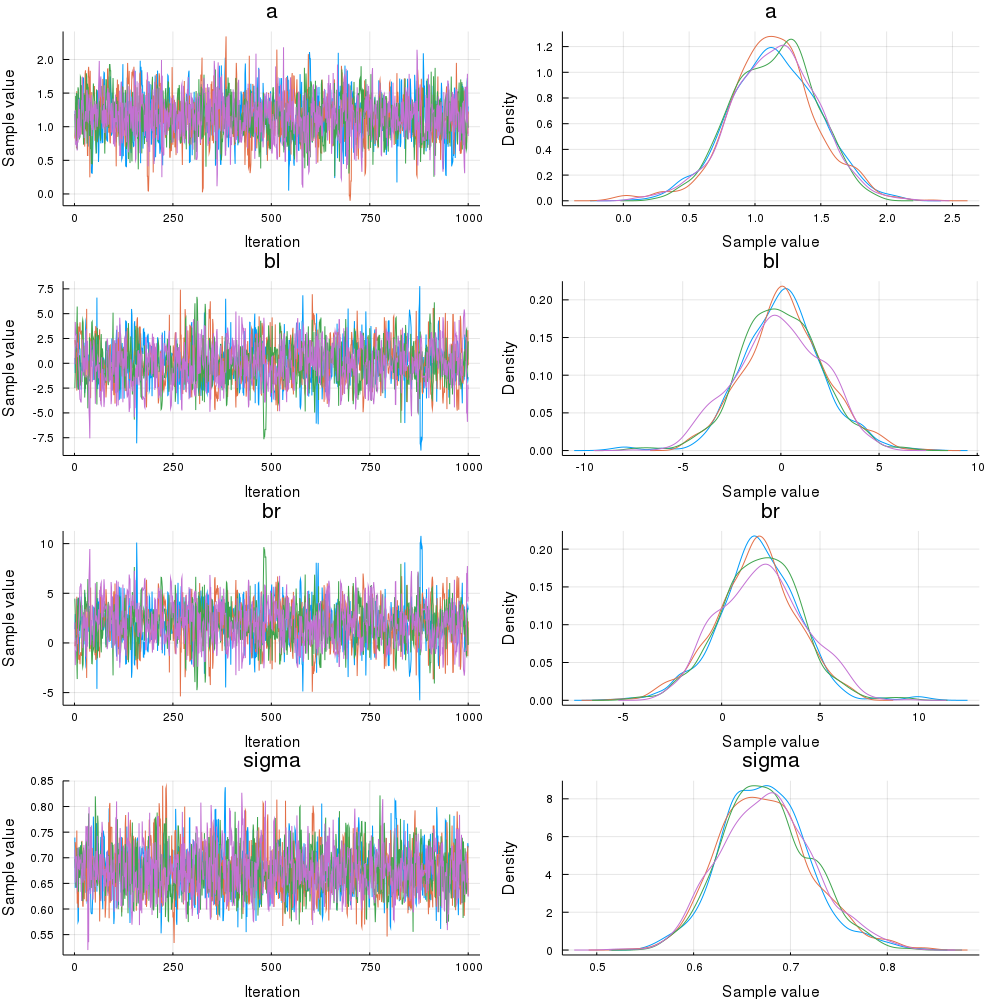

In [10]:
plot(chn)

Autocorrelation

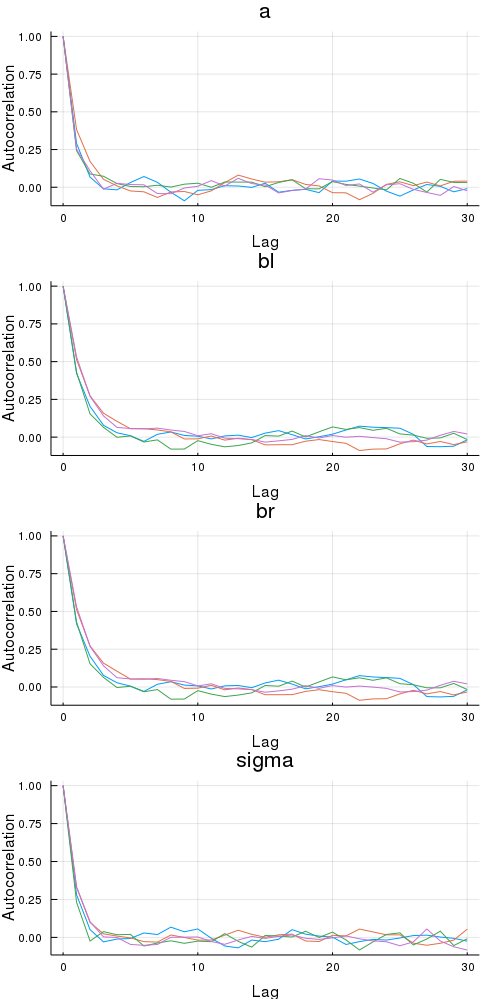

In [11]:
autocorplot(chn)

End of `08/m8.8s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*